<a href="https://colab.research.google.com/github/ge96lip/Quantum-Computing/blob/main/QC_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prerequisits

In [29]:
!pip install qiskit
!pip install qiskit_aer
!pip install qiskit-ibm-runtime
!pip install cirq

# **Exercise 1: State Vector Quantum Computer Simulator for Bell State Circuit**

Description

In this exercise, you will develop a Python program to simulate a two-qubit Bell state circuit using a state vector representation, and then you will visualize it using circle notation. A state vector simulator keeps track of the system's quantum state as a vector of complex numbers. Quantum operations are represented as matrices that act on the state vector. By implementing a state vector simulator, students will better understand how quantum states are represented and how quantum operations, such as the Hadamard and CNOT gates, act on them in state vector quantum simulators.

Hints:

Use NumPy arrays to represent matrices and vectors.
The Kronecker product can be used to combine matrices for multi-qubit operations.
The matrix-vector multiplication can be used to apply matrices to state vectors.

## Task 1.1: State Vector Representation

Define a function representing a quantum state as a 4-dimensional complex vector.
Initialize the state vector to the all-0 state.

In [30]:
import numpy as np

def initialize_state_vector():
    # create state vector and initialize it with the all 0 state
    # c1|0> , c2|1> , c3|2> , c4|3>
    # [c1, c2, c3, c4]
    return np.array([1+0j, 0+0j, 0+0j, 0+0j])

## Task 1.2: Quantum Gate Implementation

Implement functions for the Hadamard and CNOT gates:
The Hadamard gate should return the Hadamard matrix.
The CNOT gate should return the CNOT matrix.

In [31]:
def hadamard_gate():
    # Hadamard gate for a single qubit
    H = 1/np.sqrt(2) * np.array([[1,  1],
                                 [1, -1]])
    return H

def cnot_gate():
    # CNOT gate for two qubits
    CNOT = np.array([[1, 0, 0, 0],
                     [0, 1, 0, 0],
                     [0, 0, 0, 1],
                     [0, 0, 1, 0]])
    return CNOT

## Task 1.3: Circuit Simulation

Create a function to simulate the Bell state circuit:
Apply the Hadamard gate to the first qubit.
Apply the CNOT gate with the first qubit as the control and the second as the target.
Return the final state vector.

In [32]:
def simulate_bell_state():
    # Initialize the two-qubit system with the state vector |00⟩
    state_vector = initialize_state_vector()

    # Multi Qubit Operation via Kronecker product: apply Hadamard gate to first qubit and Identity matrix to second qubit
    multiQubitOperation = np.kron(hadamard_gate(), np.eye(2))
    # Apply the Multi Qubit Operation to the system
    state_vector = np.dot(multiQubitOperation, state_vector)

    # Apply CNOT gate to the system with first qubit as control and second as target
    state_vector = np.dot(cnot_gate(), state_vector)

    # Bell state where the second qubit is flipped when the first qubit is in state |1⟩.
    return state_vector

## Task 1.4: Output, Verification, and Comparison with Results from  Assignment 1

Print the final state vector to verify the correct simulation of the Bell state.
Develop a Python function to return the result of a measurement. Perform a large number of measurements (or samples) and plot the result in a histogram similar to what you have done in Assignment 1.
Compare the results you obtained with your simulator and the results from Assignment. Are they different? If so, why?

In [33]:
state_vector = simulate_bell_state()
print(state_vector)

[0.70710678+0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]



The final state vector is in the state $[c1, c2, c3, c4] = [\frac{1}{\sqrt{2}}, 0, 0 \frac{1}{\sqrt{2}}]$.
Meaning that it is correctly simulating the Bell state which is with 50% probability in the state $|00>$ and with 50% probability in the state $|11>$.


Counter({'00': 506, '11': 494})


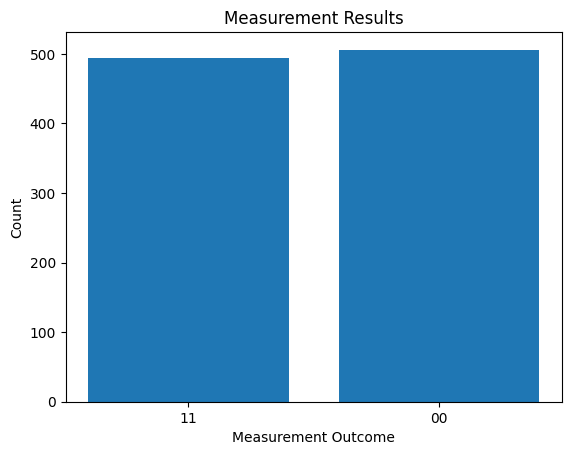

In [34]:
from collections import Counter
import matplotlib.pyplot as plt

def measure_state(state_vector, num_samples=1000):
    # Calculate probabilities by squaring the magnitude of the complex amplitudes
    probabilities = np.abs(state_vector) ** 2
    # Define the computational basis states
    basis_states = ['00', '01', '10', '11']

    # Sample based on the probabilities
    measurements = np.random.choice(basis_states, size=num_samples, p=probabilities)

    return Counter(measurements)

# Plot the Results in a Histogram
def plot_measurement_histogram(measurement_results):
    # Plot a histogram of the measurement results
    labels, counts = zip(*measurement_results.items())
    plt.bar(labels, counts)
    plt.xlabel('Measurement Outcome')
    plt.ylabel('Count')
    plt.title('Measurement Results')
    plt.show()

# Perform the measurement and store results
measurement_results = measure_state(state_vector, num_samples=1000)
print(measurement_results)

# Plot the histogram
plot_measurement_histogram(measurement_results)

Comparison to Assignment 1: The obtained result of this simulator is similar to the result of assignment 1 when using the AerSimulator. In both cases the measurement outcome is (almost) equally distributed between the two bell states $|00>$ and $|11>$.

# **Exercise 2: Quantum Random Number Generator**

Description

In this exercise, you will develop a quantum random number generator (QRNG) using a quantum computer. A QRNG leverages the inherent randomness of quantum measurements to generate truly random numbers. RNGs have applications in cryptography and Monte Carlo simulations. They are particularly valuable when traditional random number generators are biased.

## Task 2.1: Circuit Creation with Qiskit or Cirq

Create a quantum circuit for QRNG.

In [35]:
import cirq

def create_quantum_circuit():
    # Get a qubit and quantum circuit
    qbit = cirq.LineQubit(0)
    circ = cirq.Circuit()
    # Add the Hadamard and measure operations to the circuit
    circ.append([cirq.H(qbit), cirq.measure(qbit, key='z')])
    return circ

circ = create_quantum_circuit()
print(circ)

0: ───H───M('z')───


## Task 2.2: Quantum Simulator Execution

Obtain the measurement results by running a computer simulator.

In [36]:
def simulate_quantum_circuit(circ, rep=1000):
    # Simulate the circuit and obtain measurement result
    sim = cirq.Simulator()
    res = sim.run(circ, repetitions=rep)
    return res

result = simulate_quantum_circuit(circ,1000)

## Task 2.3: Random Number Generation

Extract the measurement result from the obtained results and plot the results.

Counter({0: 510, 1: 490})


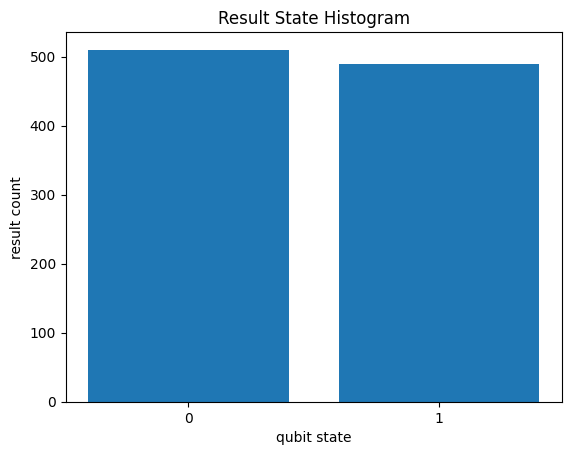

In [37]:
import matplotlib.pyplot as plt

# Print counts
counts = result.histogram(key='z')
print(counts)

# Plot histogram
cirq.plot_state_histogram(result, plt.subplot())
plt.show()

## Task 2.4: Randomness Assessment (Optional)

Run your QRNG on an IBM quantum computer.
Perform statistical tests on the generated random numbers to assess their randomness. Examples of tests include:
Frequency test: Checks if the distribution of 0s and 1s is uniform.
Serial test: Checks for correlations between consecutive bits.
Compare the "randomness" of the simulator and the quantum computer. Which one is more random?

# **Bonus Exercise: Quantum State Comparison with the SWAP Test**


Description

This exercise explores the concept of quantum state comparison and the impact of superposition on such comparisons. You will design and implement a multi-qubit quantum circuit using Qiskit to compare two three-qubit quantum systems. One system will be a randomly generated state, while the other will be a known state. The circuit will employ the Swap Test to compare quantum states.

The multiqubit Swap Test, used in this bonus exercise, is a fundamental building block for many quantum machine learning techniques. For example, it can be used to find the closest data point to a given query point in a quantum dataset (Quantum Nearest Neighbors). to group similar data points together based on their quantum states (Quantum Clustering:), and to identify unusual or unexpected data points in a quantum dataset (Quantum Anomaly Detection).

Objective:

Implement a multi-qubit quantum circuit using Qiskit or Cirq to compare two three-qubit quantum systems.
Explore the impact of superposition on quantum state comparison.

## Task B.1: Comparing Two Three-Qubit Systems

### 1. Random Quantum State Generation:
Generate a random three-qubit quantum state from the basis states |0⟩ to |7⟩ using Python's random number generation.

In [38]:
from qiskit import QuantumCircuit
import random

def create_quantum_circuit_in_default_random_state(state_number=None, print_circ=False):
    if state_number == None:
        # Select random state between |0> and |7>
        state_number = random.randint(0, 7)

    if print_circ==True:
        # Print desired state
        print('State number = ', state_number)
        print('State number binary = ', f'{state_number:03b}')

    # Create quantum circuit with three qubits initialized with 0
    circ = QuantumCircuit(3)

    # Excite qubits to reflect the desired state
    for i, bit in enumerate(f'{state_number:03b}'):
        if bit == '1':
            # Apply X gate to selected qubit
            circ.x(2-i)

    if print_circ==True:
        # Print the circuit
        print(circ)

    return circ

# Create quantum circuit in random state
circ_1 = create_quantum_circuit_in_default_random_state(print_circ=True)

State number =  1
State number binary =  001
     ┌───┐
q_0: ┤ X ├
     └───┘
q_1: ─────
          
q_2: ─────
          


### 2. Quantum State |5⟩ Generation:
Create a quantum circuit to prepare the state |5⟩ for the second three-qubit system.

In [39]:
# Create quantum circuit in state |5>
circ_2 = create_quantum_circuit_in_default_random_state(5, print_circ=True)

State number =  5
State number binary =  101
     ┌───┐
q_0: ┤ X ├
     └───┘
q_1: ─────
     ┌───┐
q_2: ┤ X ├
     └───┘


### 3. Swap Test Implementation:
Design and implement a quantum circuit for the Swap Test to compare the two quantum states.
Explain your design choices and rationale.

In [40]:
from qiskit import QuantumRegister, ClassicalRegister

def swap_test(circ_1, circ_2, repetitions=1000):

    in1 = QuantumRegister(3, name="input_1")
    in2 = QuantumRegister(3, name="input_2")
    out = QuantumRegister(1, name="output")
    c = ClassicalRegister(1, name="classical") # Classical bit required for measuremeng
    circ = QuantumCircuit(in1, in2, out, c)
    circ.compose(circ_1, [0, 1, 2], inplace=True) # Overwrite qubits 0,1,2 with qubits from circ_1
    circ.compose(circ_2, [3, 4, 5], inplace=True) # Overwrite qubits 3,4,5 with qubits from circ_2

    # Apply Hadamard gate to output qubit
    circ.h(6)

    # Perform controlled swap between input_1 and input_2 depending on state of output
    for i in range(3):
        circ.cswap(6, 0+i, 3+i)

    # Apply Hadamard gate to output qubit
    circ.h(6)

    # Apply NOT gate to output qubit
    circ.x(6)

    # Measure the output qubit (6) and put the result in the classical bit (0)
    circ.measure(6,0)

    return circ

swap_test_circ = swap_test(circ_1, circ_2)
print(swap_test_circ)

             ┌───┐                      
  input_1_0: ┤ X ├─X────────────────────
             └───┘ │                    
  input_1_1: ──────┼──X─────────────────
                   │  │                 
  input_1_2: ──────┼──┼──X──────────────
             ┌───┐ │  │  │              
  input_2_0: ┤ X ├─X──┼──┼──────────────
             └───┘ │  │  │              
  input_2_1: ──────┼──X──┼──────────────
             ┌───┐ │  │  │              
  input_2_2: ┤ X ├─┼──┼──X──────────────
             ├───┤ │  │  │ ┌───┐┌───┐┌─┐
     output: ┤ H ├─■──■──■─┤ H ├┤ X ├┤M├
             └───┘         └───┘└───┘└╥┘
classical: 1/═════════════════════════╩═
                                      0 


### 4. Measurement and Evaluation:
Simulate the circuit using Qiskit Aer or Cirq.
Measure the final state to determine if the two states are equal.
Calculate the accuracy of the Swap Test in identifying |5⟩.
Analyze cases of incorrect identification or failure to identify |5⟩.

Counts: 0 :  4454
Counts: 1 :  5546
P(outcome=1): 55.5%


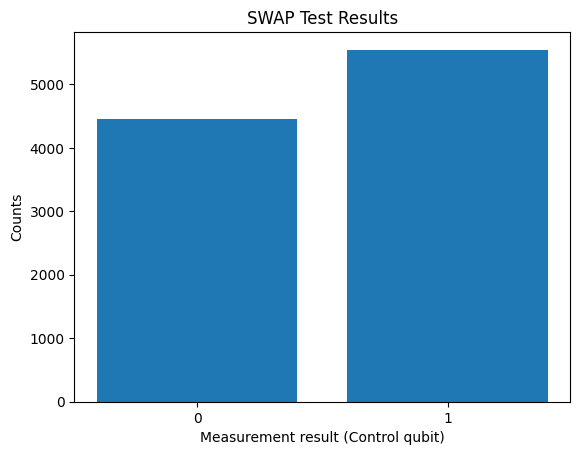

In [44]:
import qiskit
from qiskit_aer import AerSimulator

def simulate_swap_test_circuit(swap_test_circuit, repetitions=10000):
    simulater = AerSimulator()
    counter_result_1 = 0

    # Define second 3-qubit system in state 5
    circ_2 = create_quantum_circuit_in_default_random_state(5)

    for i in range(repetitions):
        # Generate new random state
        circ_1 = create_quantum_circuit_in_default_random_state()
        # Update circuit
        swap_test_circuit = swap_test(circ_1, circ_2)

        # Simulate result
        result = simulater.run(swap_test_circuit, shots=1).result()

        # Update Counter
        counts = result.get_counts()
        if counts.get('1') == 1:
            counter_result_1 = counter_result_1 + 1

    # Print counts
    print('Counts: 0 : ', repetitions - counter_result_1)
    print('Counts: 1 : ', counter_result_1)

    # Calculate probability of P(outcome=1)
    probability = counter_result_1 / repetitions
    print('P(outcome=1): ' + f"{probability:.1%}")

    # Plot the measurement results in a histogram
    plt.bar(['0', '1'], [repetitions - counter_result_1, counter_result_1])
    plt.xlabel('Measurement result (Control qubit)')
    plt.ylabel('Counts')
    plt.title('SWAP Test Results')
    plt.show()

simulate_swap_test_circuit(swap_test_circ)

P(outcome=1) = 50% means that the two states are not equal

P(outcome=1) = 100% means that the two states are identical

In this case the probability is slightly above 50% which means that the two states are sometimes equal.

Theoretical the two states are equal in 1 out of 8 cases (because the random quantum state can be in any of the eight basis states $|0>$ to $|7>$).
This corresponds to a expected input similarity of $P=\frac{1}{8}=0.125$.

As we can see in the plot, a fidelity of 0.125 roughly corresponds to a propability of measuring 1 of slightly above 50% which matches with the simulation result.

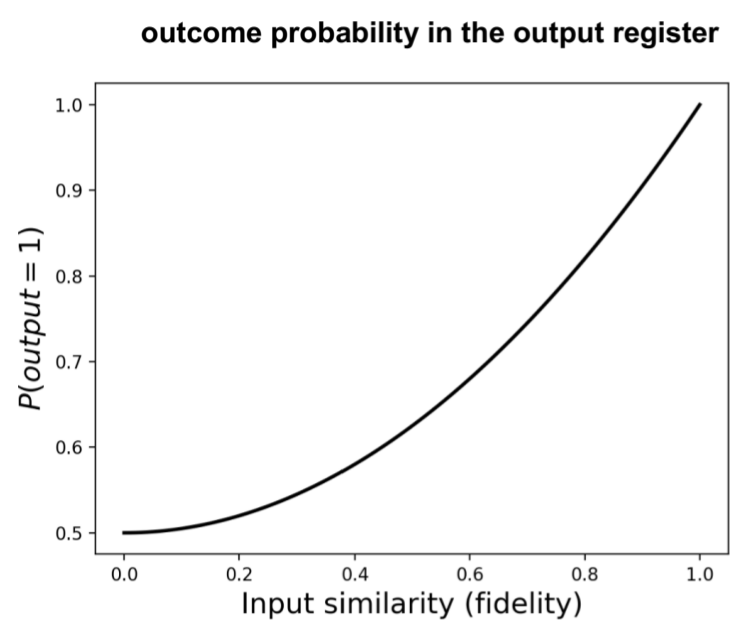

## Task B.2: Introducing Superposition

### 1. Superposition Creation:
Modify the circuit to place one qubit of the randomly generated state into superposition using a Hadamard gate.

In [45]:
from qiskit import QuantumCircuit
import random

def create_quantum_circuit_in_default_random_state(state_number=None, superposition=False, print_circ=False):
    if state_number == None:
        # Select random state between |0> and |7>
        state_number = random.randint(0, 7)

    if print_circ==True:
        # Print desired state
        print('State number = ', state_number)
        print('State number binary = ', f'{state_number:03b}')

    # Create quantum circuit with three qubits initialized with 0
    circ = QuantumCircuit(3)

    # Excite qubits to reflect the desired state
    for i, bit in enumerate(f'{state_number:03b}'):
        if bit == '1':
            # Apply X gate to selected qubit
            circ.x(2-i)

    if superposition==True:
        # Apply Hadamard gate to first qubit to bring it in superposition state
        circ.h(0)

    if print_circ==True:
        # Print the circuit
        print(circ)

    return circ


# Create quantum circuit in random state
circ_1 = create_quantum_circuit_in_default_random_state(superposition=True, print_circ=True)

State number =  2
State number binary =  010
     ┌───┐
q_0: ┤ H ├
     ├───┤
q_1: ┤ X ├
     └───┘
q_2: ─────
          


### 2. Measurement and Evaluation:
Simulate the modified circuit.
Measure the final state and determine if the states are equal.
Compare the accuracy results from Task B.1 and Task B.2.
Analyze the impact of superposition on the comparison accuracy.

Counts: 0 :  4393
Counts: 1 :  5607
P(outcome=1): 56.1%


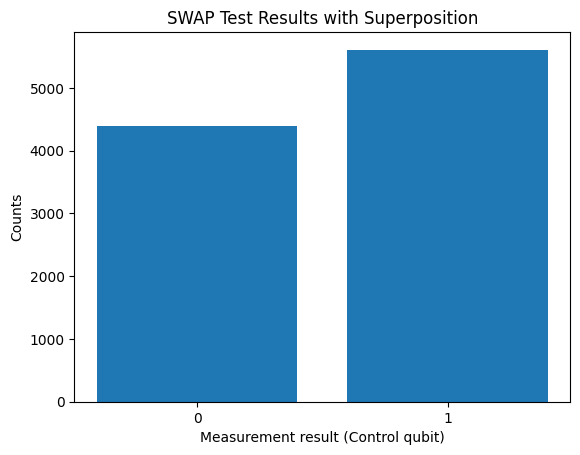

In [46]:
import qiskit
from qiskit_aer import AerSimulator

def simulate_swap_test_circuit(swap_test_circuit, repetitions=10000):
    simulater = AerSimulator()
    counter_result_1 = 0

    # Define second 3-qubit system in state 5
    circ_2 = create_quantum_circuit_in_default_random_state(5)

    for i in range(repetitions):
        # Generate new random state with one qubit in superposition
        circ_1 = create_quantum_circuit_in_default_random_state(superposition=True)
        # Update circuit
        swap_test_circuit = swap_test(circ_1, circ_2)

        # Simulate result
        result = simulater.run(swap_test_circuit, shots=1).result()

        # Update Counter
        counts = result.get_counts()
        if counts.get('1') == 1:
            counter_result_1 = counter_result_1 + 1

    # Print counts
    print('Counts: 0 : ', repetitions - counter_result_1)
    print('Counts: 1 : ', counter_result_1)

    # Calculate probability of P(outcome=1)
    probability = counter_result_1 / repetitions
    print('P(outcome=1): ' + f"{probability:.1%}")

    # Plot the measurement results in a histogram
    plt.bar(['0', '1'], [repetitions - counter_result_1, counter_result_1])
    plt.xlabel('Measurement result (Control qubit)')
    plt.ylabel('Counts')
    plt.title('SWAP Test Results with Superposition')
    plt.show()

simulate_swap_test_circuit(swap_test_circ)

Comparing the results between task B.1 and B.2, one can see that they are very similar.

In task B.1 the first 3-qubit system represented a random quantum state, meaning each of the three qubits is randomly either in state $|0>$ or $|1>$.

In task B.2 we additionally placed one of the three qubits into superposition. If we measure the state of a qubit in superposition it collapses to one of the two basis states $|0>$ or $|1>$ with equal probability. But since the state of all three qubits are already randomly selected it doesn't matter if we flip one qubit with 50% probability. The resulting quantum state is still random and in 1 out of 8 cases similar to the second system which is in $|5>$ state.

Hence this explains the similar measurement outcomes.